# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

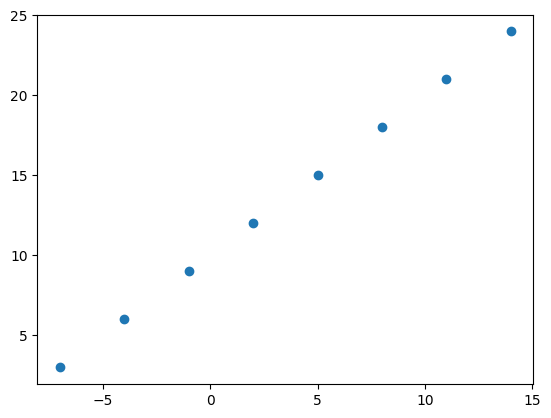

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

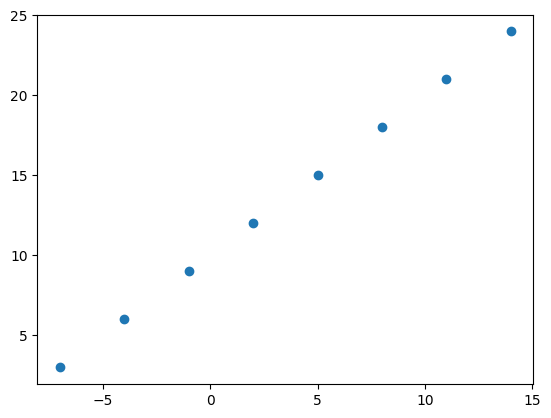

In [10]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

## Burdaki ornekler ile alt satirdaki kod blogunda bulunan 1. madde aynı islevi gerceklestirir bu biraz uzun yazim seklidir
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8, input_shape = (16,)))

...

Above is an example

- Below 1. state

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # X[0].shape yaptigimizda herhangi bir sonuca ulasamadik bu scalar bir degere denk geliyor ve tek bir deger veriyoruz input olarak.
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 437ms/step - loss: 13.0708 - mae: 13.0708
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 12.9383 - mae: 12.9383
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 12.8058 - mae: 12.8058
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 12.6733 - mae: 12.6733
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 12.5408 - mae: 12.5408


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[5.1095233]], dtype=float32)

In [14]:
y_pred + 11 ## 11 is loss but it is still bad prediction

array([[16.109524]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 258ms/step - loss: 14.4993 - mae: 14.4993
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 14.3668 - mae: 14.3668
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2343 - mae: 14.2343
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 14.1018 - mae: 14.1018
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9693 - mae: 13.9693
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.8368 - mae: 13.8368
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7043 - mae: 13.7043
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5718 - mae: 13.5718
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4393 - mae: 13.4393
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3068 - mae: 13.3068
Epoch 11/100
1/1 [==============================] - 0s 

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[29.356445]], dtype=float32)

In [18]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae", # "tf.keras.losses.mae" and "mae" are same
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 313ms/step - loss: 12.9071 - mae: 12.9071
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4552 - mae: 12.4552
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0062 - mae: 12.0062
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5430 - mae: 11.5430
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0644 - mae: 11.0644
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5687 - mae: 10.5687
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0470 - mae: 10.0470
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5045 - mae: 9.5045
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9346 - mae: 8.9346
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3276 - mae: 8.3276
Epoch 11/100
1/1 [==============================] - 0s 7ms/ste

In [19]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Let's try to make a prediction
model.predict([17.0])
# Normalde y degeri x degerinin 10 fazlasi olmali yani cevap 27 ve bir onceki islemde 29 vermisti bu sefer 31.78 aldik dolayisiyla negatif bir sonuc
# modelimiz overfitting yapiyor yani asiri ogrenmeye yaklasiyor

1/1 [==============================] - 0s 54ms/step


array([[32.641342]], dtype=float32)

In [21]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae", # "tf.keras.losses.mae" and "mae" are same
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Adam optimizer is the most valuable hyperparameter
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 457ms/step - loss: 12.1789 - mae: 12.1789
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8080 - mae: 11.8080
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5327 - mae: 11.5327
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1003 - mae: 11.1003
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7517 - mae: 10.7517
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4081 - mae: 10.4081
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0547 - mae: 10.0547
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6897 - mae: 9.6897
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3137 - mae: 9.3137
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9289 - mae: 8.9289
Epoch 11/100
1/1 [==============================] - 0s 11ms/ste

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[27.549974]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.....```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

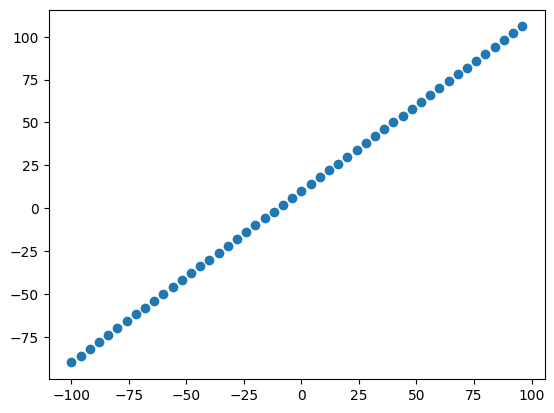

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically %70-80 of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training examples (%80 of the data)
y_train = y[:40] # same idea as X

X_test = X[40:] # Last 10 are testing examples (%20 of the data)
y_test = y[40:] # same idea as X

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets.. let's visualize it again!

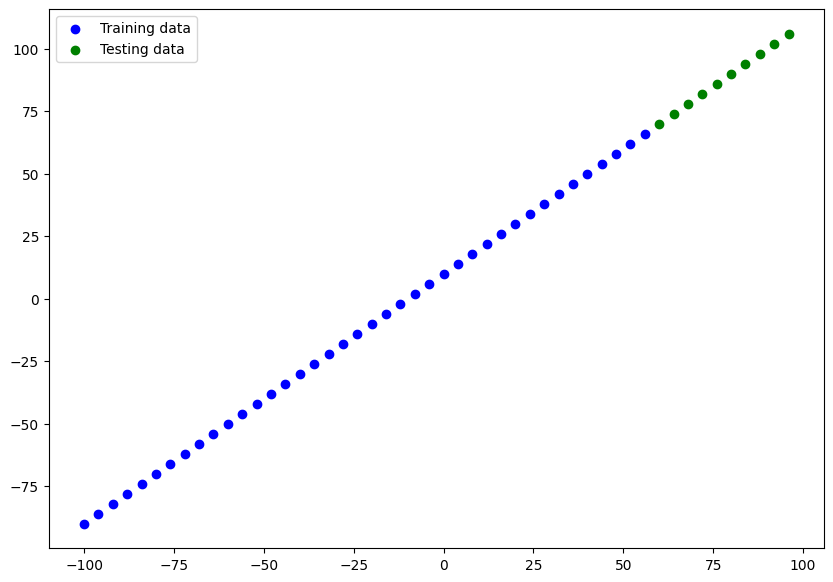

In [28]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
# Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [31]:
model.summary()

ValueError: ignored

In [32]:
X[0].shape, X[0], y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"), # input_shape = [1] tek bir eleman input olarak veriliyor -100 gibi
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are parameters (pattern) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [35]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0) # verbose = 0 herhangi bir output vermez.

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


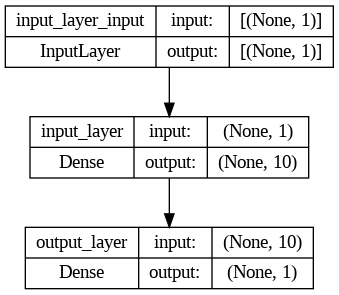

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 90.98099 ],
       [ 96.92436 ],
       [102.86774 ],
       [108.81112 ],
       [114.75449 ],
       [120.69788 ],
       [126.641266],
       [132.58464 ],
       [138.52802 ],
       [144.47139 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  # Show a legend
  plt.legend();

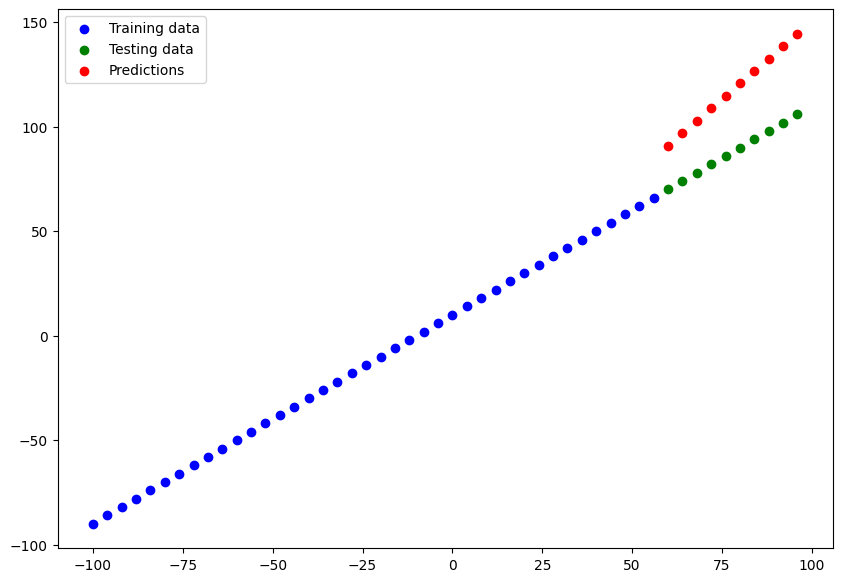

In [41]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average , how wrong is each of my model's predictions"
* MSE - mean squared error, "square the average errors"

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 29.7262 - mae: 29.7262


[29.7261905670166, 29.7261905670166]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.1961975, 11.969745 , 15.494189 , 20.81112  , 26.754492 ,
       32.697884 , 38.641266 , 44.58464  , 50.528015 , 56.471386 ],
      dtype=float32)>

In [44]:
y_pred

array([[ 90.98099 ],
       [ 96.92436 ],
       [102.86774 ],
       [108.81112 ],
       [114.75449 ],
       [120.69788 ],
       [126.641266],
       [132.58464 ],
       [138.52802 ],
       [144.47139 ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.98099 ,  96.92436 , 102.86774 , 108.81112 , 114.75449 ,
       120.69788 , 126.641266, 132.58464 , 138.52802 , 144.47139 ],
      dtype=float32)>

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred)) # Ustteki ornekte squeeze yapmadik ve y_test ile y_pred shape'i farkliydi sonuc alamadik.
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.72619>

In [48]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=914.8043>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it... ```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationship between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 15.2070 - mae: 15.2070
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9560 - mae: 10.9560
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7025 - mae: 11.7025
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3259 - mae: 9.3259
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1987 - mae: 10.1987
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4575 - mae: 9.4575
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5931 - mae: 8.5931
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0456 - mae: 9.0456
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.8094 - mae: 18.8094
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1460 - mae: 10.1460
Epoch 11/100
2/2 [==============================] - 0s 7ms/step -

1/1 [==============================] - 0s 57ms/step


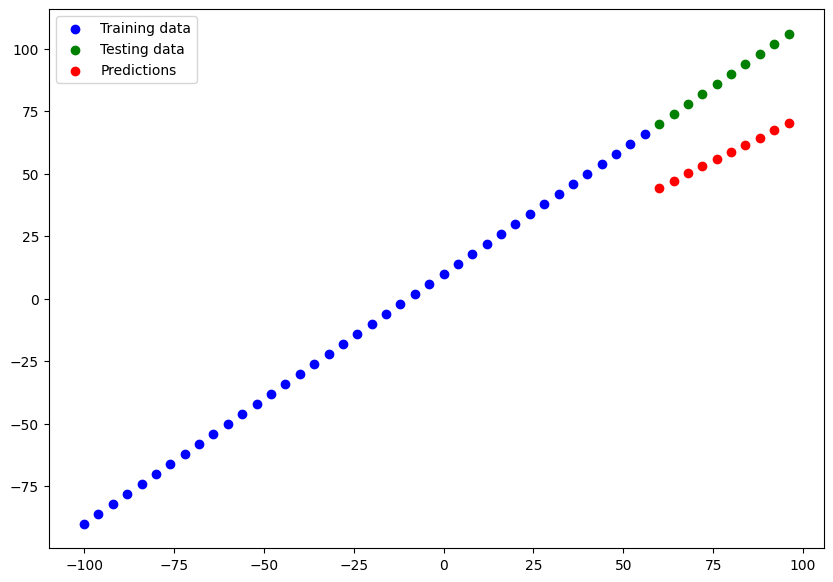

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.67312>,
 <tf.Tensor: shape=(), dtype=float32, numpy=951.3215>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.9063 - mse: 1422.7815
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 25.2259 - mse: 909.6188
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 30.1118 - mse: 1359.7465
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 16.3199 - mse: 388.1418
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 22.3675 - mse: 732.1189
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3016 - mse: 142.8464
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.3684 - mse: 197.9722
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0204 - mse: 141.8931
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.0710 - mse: 2376.1633
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6446 - mse: 997.9434
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 38ms/step


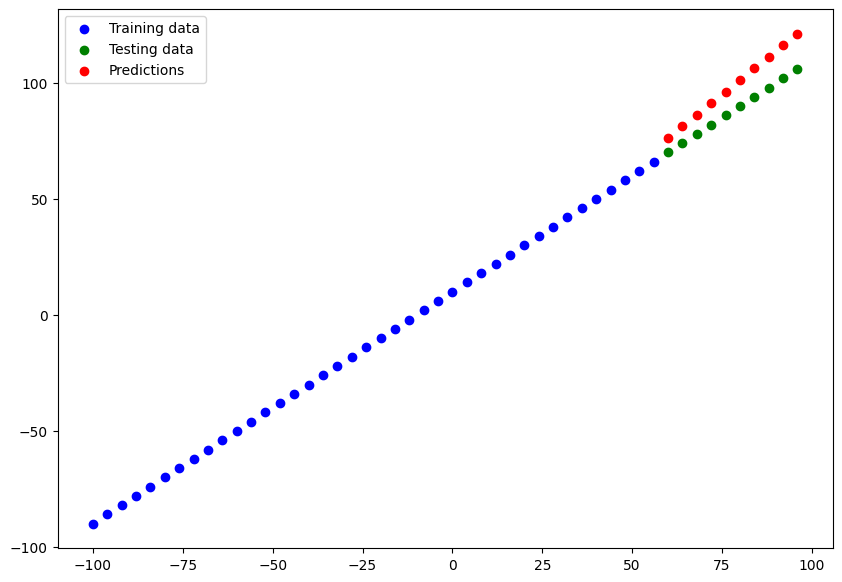

In [54]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.761274>,
 <tf.Tensor: shape=(), dtype=float32, numpy=123.67>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [56]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 38.2306 - mae: 38.2306
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 23.2736 - mae: 23.2736
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 27.9857 - mae: 27.9857
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 12.8346 - mae: 12.8346
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 15.8553 - mae: 15.8553
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5574 - mae: 12.5574
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.8137 - mae: 11.8137
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 12.8621 - mae: 12.8621
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 33.8327 - mae: 33.8327
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 23.1519 - mae: 23.1519
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 74ms/step


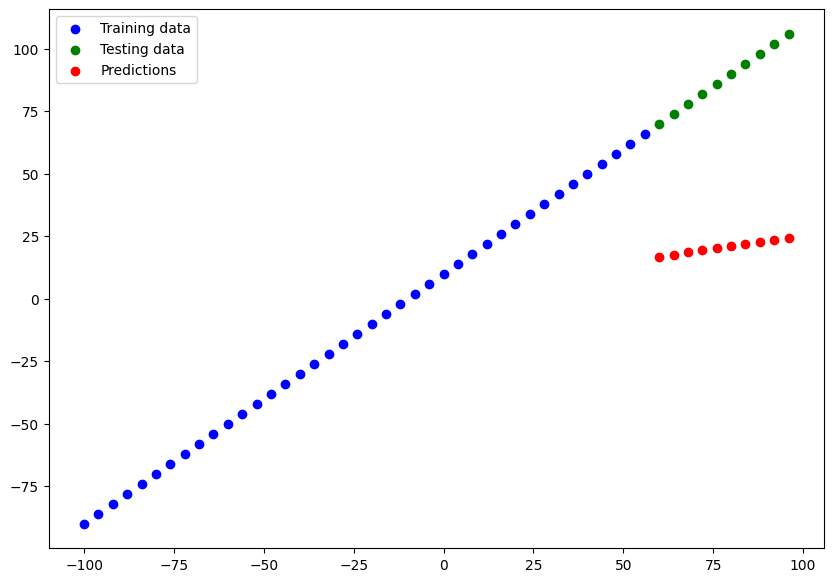

In [57]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)
# Cok fazla deneme yaptigimiz icin (epochs=500) overfitting oldu ve model_1den bile daha kotu sonuc aldik

In [58]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.39138>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4624.591>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [59]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.673120,951.321472
1,model_2,10.761274,123.669998
2,model_3,67.391380,4624.590820


Looks like `model_2` performed the best..

In [60]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [61]:
# Save model using the SavedModel format, bu yontem hata vermesine ragmen dosyamizi kaydeder fakat kontrol etme istegi duyabiliriz.
model_2.save("best_model_SavedModel_format")

In [62]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [63]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compare model_2 predictions with SavedModel format model predictions, .h5 model load is same
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 68ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [66]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
# Ilk olarak numerical encoding yapip textleri sayiya cevirmeliyiz.(one-hot encoding)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [69]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [70]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [71]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [72]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [73]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8658.7744 - mae: 8658.7744
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7874.8638 - mae: 7874.8638
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7598.1270 - mae: 7598.1270
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7685.9834 - mae: 7685.9834
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7689.4854 - mae: 7689.4854
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7644.1167 - mae: 7644.1167
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7495.5376 - mae: 7495.5376
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7726.7905 - mae: 7726.7905
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7487.9878 - mae: 7487.9878
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1602 - mae: 7718.1602

In [74]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5836.7217 - mae: 5836.7217


[5836.7216796875, 5836.7216796875]

In [75]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model , we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. (insert your own experiment here)

In [76]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13319.7529 - mae: 13319.7529
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13178.0996 - mae: 13178.0996
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12879.2695 - mae: 12879.2695
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12264.0352 - mae: 12264.0352
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11181.7607 - mae: 11181.7607
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9719.7363 - mae: 9719.7363
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8309.8184 - mae: 8309.8184
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7569.6714 - mae: 7569.6714
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7433.6099 - mae: 7433.6099
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7412.5200 - mae:

In [77]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 4850.3242 - mae: 4850.3242


[4850.32421875, 4850.32421875]

In [78]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5836.7217 - mae: 5836.7217


[5836.7216796875, 5836.7216796875]

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13283.0283 - mae: 13283.0283
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13123.1025 - mae: 13123.1025
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12780.1758 - mae: 12780.1758
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12106.2568 - mae: 12106.2568
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10979.1260 - mae: 10979.1260
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9538.2266 - mae: 9538.2266
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8207.5420 - mae: 8207.5420
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7550.7456 - mae: 7550.7456
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7436.7227 - mae: 7436.7227
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7415.5361 - mae:

In [80]:
# Evaluate our third model, 3 model icinde en iyi sonucu veren model bu oldu
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3503.0759 - mae: 3503.0759


[3503.075927734375, 3503.075927734375]

In [81]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5836.7217 - mae: 5836.7217


[5836.7216796875, 5836.7216796875]

In [82]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4850.3242 - mae: 4850.3242


[4850.32421875, 4850.32421875]

Text(0.5, 0, 'epochs')

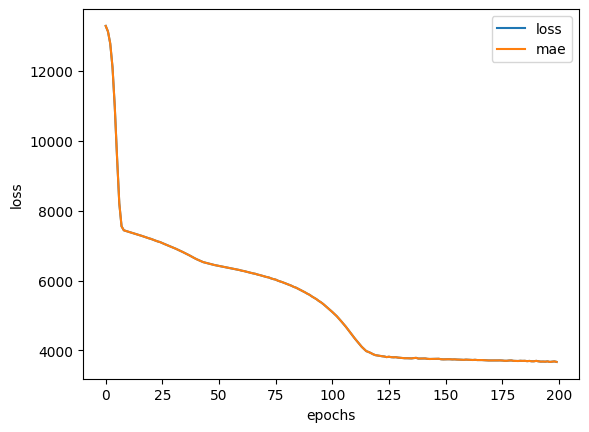

In [83]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [92]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [98]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [99]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one-hot encoded.
Now let's build a neural network model on it and see how it goes.

In [110]:
# Build a neural network model to fit on our normalized data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13343.8467 - mae: 13343.8467
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13335.7012 - mae: 13335.7012
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13315.6445 - mae: 13315.6445
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.2148 - mae: 13273.2148
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13197.0674 - mae: 13197.0674
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13075.7432 - mae: 13075.7432
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12898.7168 - mae: 12898.7168
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12655.9023 - mae: 12655.9023
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12337.1191 - mae: 12337.1191
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11937.39

In [111]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.7505 - mae: 3437.7505


[3437.75048828125, 3437.75048828125]

<Axes: ylabel='Frequency'>

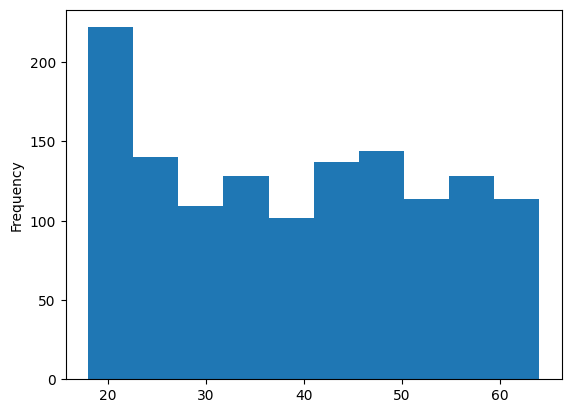

In [87]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

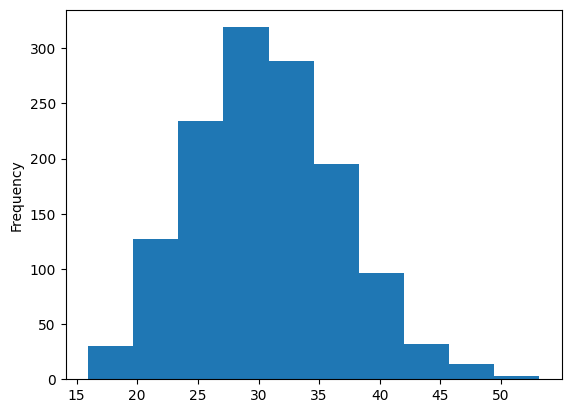

In [88]:
X["bmi"].plot(kind="hist")

In [89]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64